# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import seaborn as sns
from sklearn import impute

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [108]:
print("Для воспроизводимости результата. В зависимости от выборки могут отличаться результаты обучения и метрики.")

Для воспроизводимости результата. В зависимости от выборки могут отличаться результаты обучения и метрики.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [109]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [110]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [111]:
print("Первые 5 объектов тестового датасета")
df_test.head(5)

Первые 5 объектов тестового датасета


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [112]:
print("Последние 5 объектов тестового датасета")
df_test.tail(5)

Последние 5 объектов тестового датасета


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [113]:
print("Статистики по числовым столбцам для трейна")
df_train.describe()

Статистики по числовым столбцам для трейна


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [114]:
print("Статистики по числовым столбцам для теста")
df_test.describe()

Статистики по числовым столбцам для теста


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [115]:
print("Статистика по категориальным столбцам для трейна")
df_train.describe(include=['object'])

Статистика по категориальным столбцам для трейна


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [116]:
print("Статистика по категориальным столбцам для теста")
df_test.describe(include=['object'])

Статистика по категориальным столбцам для теста


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [117]:
df_train.info()
print(f"Пропуски в колонках mileage, engine, max_power, torque, seats")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB
Пропуски в колонках mileage, engine, max_power, torque, seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [118]:
feature_columns = df_train.columns.difference(["selling_price"]).tolist()
df_train_duplicates = df_train[df_train.duplicated(subset=feature_columns, keep=False)].sort_values("name")
print(f"Количество объектов с одинаковым признаковым описанием = {len(df_train_duplicates)}")

Количество объектов с одинаковым признаковым описанием = 1799


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [119]:
df_train_duplicates

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
1568,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [120]:
df_train = df_train.drop_duplicates(subset=feature_columns, keep='first')

In [121]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [122]:
df_train = df_train.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [123]:
print("Варианты единиц измерения для колонок mileage, engine, max_power")
for c_name in ("mileage", "engine", "max_power"):
    units = df_train[c_name].str.extract(r'([a-zA-Z/]+)', expand=False)
    unique_units = set(units.dropna())
    print(f"units types in {c_name} column: {unique_units}")


Варианты единиц измерения для колонок mileage, engine, max_power
units types in mileage column: {'kmpl', 'km/kg'}
units types in engine column: {'CC'}
units types in max_power column: {'bhp'}


In [124]:
def _replace_numbers(text):
    if text is np.nan:
        return text
    return re.sub(r"\d+", "*", text)

units = df_train["torque"].apply(_replace_numbers)
print("Варианты размерности в колонке torque")
print(units.unique())

Варианты размерности в колонке torque
['*Nm@ *rpm' '*Nm@ *-*rpm' '*.* kgm at *-*rpm' '*.*@ *,*(kgm@ rpm)'
 '*.*nm@ *rpm' nan '*.*Nm@ *-*rpm' '*.*Nm@ *rpm' '*.*kgm@ *rpm'
 '*Nm@ *~*rpm' '*nm@ *-*rpm' '*@ *-*rpm' '*Nm' '* Nm at * rpm'
 '*Nm at * rpm' '*.* kgm at *,* rpm' '*.*nm@ *-*rpm' '*nm@ *rpm'
 '*.*@ *-*(kgm@ rpm)' '* Nm at *-*rpm' '*@ *,*-*,*(kgm@ rpm)'
 '* Nm at *  rpm ' '* KGM at *-* RPM' '*.*@ *,*-*,*(kgm@ rpm)'
 '*@ *,*(kgm@ rpm)' '*Nm at *-* rpm' '* Nm at *-* rpm' '*Nm(*.*kgm)@ *rpm'
 '* Nm at * rpm ' '*.* KGM at * RPM' '*Nm@ *+/-*rpm' '*@ *-*'
 '* Nm /* rpm' '*NM@ *rpm' '*@ *(kgm@ rpm)' '*Nm@ *,*rpm' '*.*NM@ *-*rpm'
 '*.*Nm@ *' '*NM@ *-*rpm' '*Nm@ *-*' '* / *' '*.* kgm at * rpm'
 '* Nm at *,*-*,* rpm' '* Nm at *rpm' '*@ *,*+/-*(NM@ rpm)'
 '*.*@ *(kgm@ rpm)']


In [125]:
def _recalculate_mileage(row):
    fuel_density = 0.78  # kg/l - average between diesel and gasoline
    try:
        value, unit = row.split()
        if unit.lower() == "kmpl":
            return float(value)
        elif unit.lower() == "km/kg":
            return float(value) * fuel_density
        else:
            return np.nan
    except Exception:
        return np.nan


def _convert_string_to_float(row):
    try:
        value, unit = row.split()
        return float(value)
    except Exception:
        return np.nan


def update_df_columns_with_units(df: pd.DataFrame) -> pd.DataFrame:
    df_out = df.copy()
    df_out["mileage"] = df_out["mileage"].apply(_recalculate_mileage)
    for c_name in ("engine", "max_power"):
        df_out[c_name] = df_out[c_name].apply(_convert_string_to_float)
    # TODO: add torque update logic
    return df_out

In [126]:
df_train = update_df_columns_with_units(df_train)
df_test = update_df_columns_with_units(df_test)

In [127]:
print("Delete torque column")
df_train = df_train.drop(columns=["torque"], axis=1)
df_test = df_test.drop(columns=["torque"], axis=1)

Delete torque column


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [128]:
cat_features_mask = (df_train.dtypes == "object").values

mis_replacer = impute.SimpleImputer(strategy="mean")

df_train_real = df_train[df_train.columns[~cat_features_mask]]
df_train_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(df_train_real),
                                    columns=df_train_real.columns)
df_train_cat = df_train[df_train.columns[cat_features_mask]].fillna("NA")
df_train_no_mis = pd.concat([df_train_no_mis_real, df_train_cat], axis=1)

df_test_real = df_test[df_test.columns[~cat_features_mask]]
df_test_no_mis_real = pd.DataFrame(data=mis_replacer.transform(df_test_real),
                                   columns=df_test_real.columns)
df_test_cat = df_test[df_test.columns[cat_features_mask]].fillna("NA")
df_test_no_mis = pd.concat([df_test_no_mis_real, df_test_cat], axis=1)

df_train_no_mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5840 non-null   float64
 1   selling_price  5840 non-null   float64
 2   km_driven      5840 non-null   float64
 3   mileage        5840 non-null   float64
 4   engine         5840 non-null   float64
 5   max_power      5840 non-null   float64
 6   seats          5840 non-null   float64
 7   name           5840 non-null   object 
 8   fuel           5840 non-null   object 
 9   seller_type    5840 non-null   object 
 10  transmission   5840 non-null   object 
 11  owner          5840 non-null   object 
dtypes: float64(7), object(5)
memory usage: 547.6+ KB



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [129]:
print("В зависимости от количества мест, может меняться класс автомобиля \n"
      "и влияние на цену этого признака, скорее всего, будет нелинейным \n"
      "и связано с типом авто. Например, 2 места может быть у дорогого \n"
      "спорткара или компактной недорогой малолитражки, но не может быть \n"
      "у пассажирского микроавтобуса. Пять мест - у представительского авто, \n"
      "а 7 мест - у недорого семейного универсала с откидными местами в багажнике. \n"
      "Все это больше похоже на категориальные признаки, чем на числовые. К тому же, \n"
      "есть не так много вариантов по количеству мест. Вполне можно закодировать их \n"
      )

В зависимости от количества мест, может меняться класс автомобиля 
и влияние на цену этого признака, скорее всего, будет нелинейным 
и связано с типом авто. Например, 2 места может быть у дорогого 
спорткара или компактной недорогой малолитражки, но не может быть 
у пассажирского микроавтобуса. Пять мест - у представительского авто, 
а 7 мест - у недорого семейного универсала с откидными местами в багажнике. 
Все это больше похоже на категориальные признаки, чем на числовые. К тому же, 
есть не так много вариантов по количеству мест. Вполне можно закодировать их 



In [130]:
# Преобразуем строковые колонки в категориальные (кроме названия автомобиля)
def convert_df_objects_to_categories_in_place(df: pd.DataFrame) -> None:
    object_cols = df.select_dtypes("object").drop("name", axis=1).columns
    df[object_cols] = df_train_no_mis[object_cols].astype("category")

In [131]:
print("Преобразуем строковые параметры в категориальные для тренировочного и "
      "тестового датасетов")
print(f"Размер тренировочного датасета перед оптимизацией: "
      f"{df_train_no_mis.memory_usage().sum() / 1024}")
print(f"Размер тестового датасета перед оптимизацией: "
      f"{df_test_no_mis.memory_usage().sum() / 1024}")
convert_df_objects_to_categories_in_place(df_train_no_mis)
convert_df_objects_to_categories_in_place(df_test_no_mis)
print(f"Размер тренировочного датасета после преобразования строковых колонок: "
      f"{df_train_no_mis.memory_usage().sum() / 1024}")
print(f"Размер тестового датасета после преобразования строковых колонок: "
      f"{df_test_no_mis.memory_usage().sum() / 1024}")

Преобразуем строковые параметры в категориальные для тренировочного и тестового датасетов
Размер тренировочного датасета перед оптимизацией: 547.625
Размер тестового датасета перед оптимизацией: 93.875
Размер тренировочного датасета после преобразования строковых колонок: 388.59375
Размер тестового датасета после преобразования строковых колонок: 67.1875


In [132]:
def update_int_columns_type_in_place(df: pd.DataFrame) -> None:
    int_cols = ["year", "engine", "seats"]
    for c in int_cols:
        df[c] = df[c].astype('int32')


def update_float_columns_type_in_place(df: pd.DataFrame) -> None:
    f_cols = df.select_dtypes('float').columns
    df[f_cols] = df[f_cols].astype('float32')

In [133]:
print("Преобразуем целочисленные признаки в int32 формат")
update_int_columns_type_in_place(df_train_no_mis)
update_int_columns_type_in_place(df_test_no_mis)

print("Преобразуем остальные числовые признаки в float32 формат,"
      " т.к. размерность позволяет обойтись без 64 разрядности")
update_float_columns_type_in_place(df_train_no_mis)
update_float_columns_type_in_place(df_test_no_mis)
print(f"Размер тренировочного датасета после преобразования числовых колонок: "
      f"{df_train_no_mis.memory_usage().sum() / 1024}")
print(f"Размер тестового датасета после преобразования числовых колонок: "
      f"{df_test_no_mis.memory_usage().sum() / 1024}")

Преобразуем целочисленные признаки в int32 формат
Преобразуем остальные числовые признаки в float32 формат, т.к. размерность позволяет обойтись без 64 разрядности
Размер тренировочного датасета после преобразования числовых колонок: 228.90625
Размер тестового датасета после преобразования числовых колонок: 39.84375


In [134]:
print(f"Информация тренировочному датасету после преобразований")
df_train_no_mis.info()

Информация тренировочному датасету после преобразований
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           5840 non-null   int32   
 1   selling_price  5840 non-null   float32 
 2   km_driven      5840 non-null   float32 
 3   mileage        5840 non-null   float32 
 4   engine         5840 non-null   int32   
 5   max_power      5840 non-null   float32 
 6   seats          5840 non-null   int32   
 7   name           5840 non-null   object  
 8   fuel           5840 non-null   category
 9   seller_type    5840 non-null   category
 10  transmission   5840 non-null   category
 11  owner          5840 non-null   category
dtypes: category(4), float32(4), int32(3), object(1)
memory usage: 228.9+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

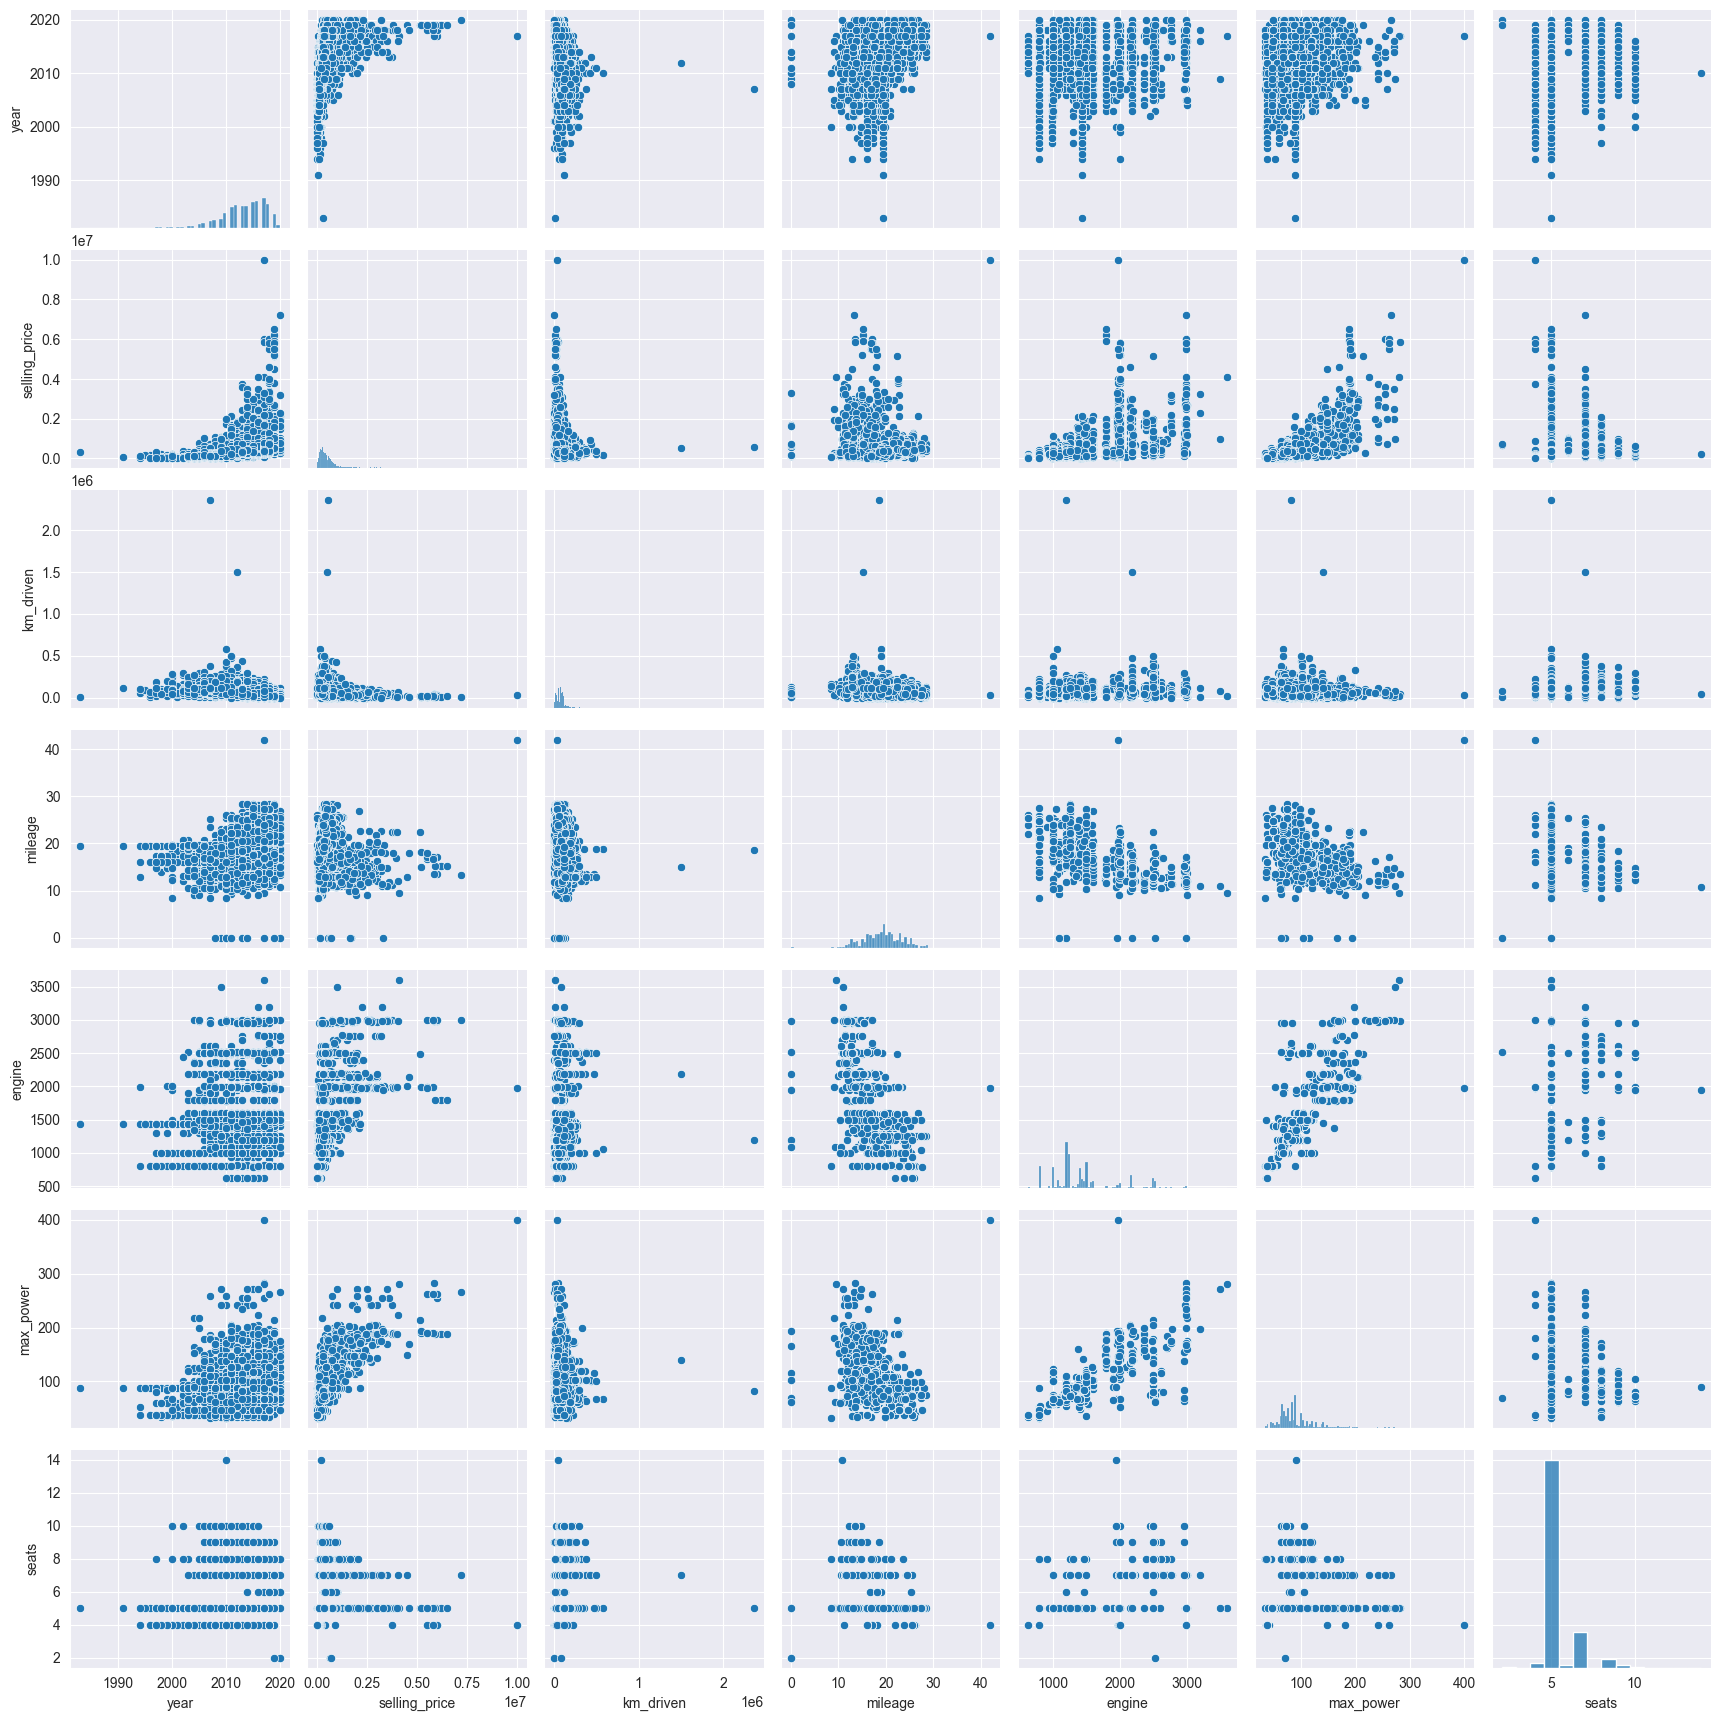

In [135]:
sns.pairplot(df_train_no_mis)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**Связь предикторов с целевой переменной**
- возможно, квадратичная связь между годом и ценой
- обратная корреляция c `km_driven`
- прямая корреляция с `engine`
- хорошо прослеживается прямая корреляция с `max_power`
- заметна обратная корреляция с `seats`

**Корреляция признаков между собой**
- небольшая корреляция между `year` и `km_driven`
- обратная корреляция между `mileage` и `engine`, `max_power`
- выраженная прямая корреляция между `engine` и `max_power`

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

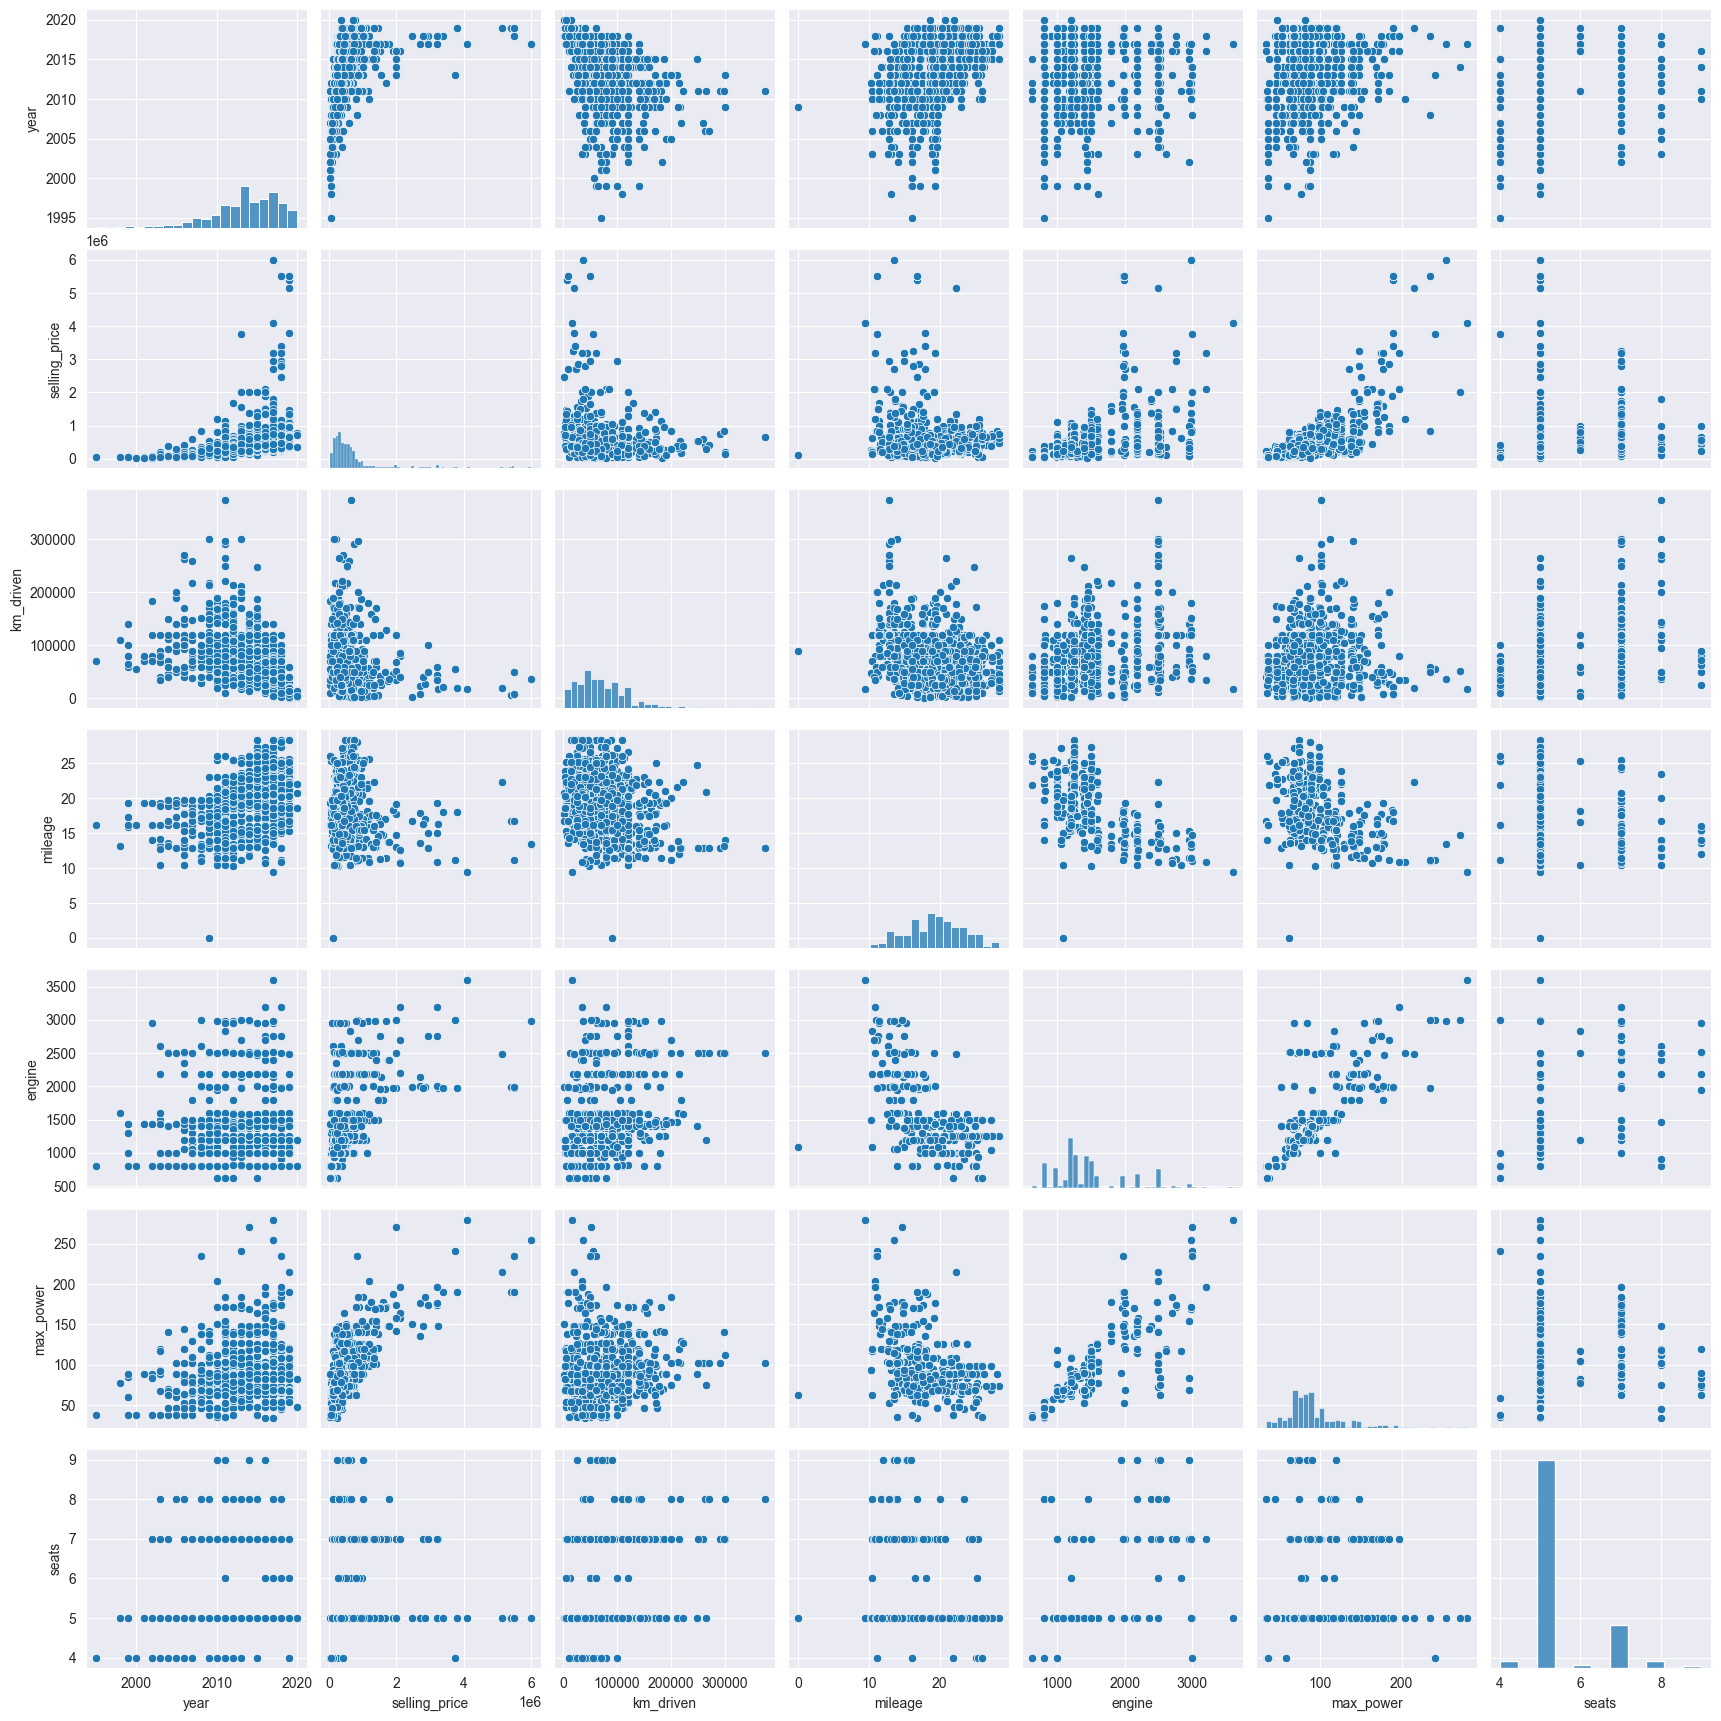

In [136]:
sns.pairplot(df_test_no_mis)

Совокупности train и test похожи. Из различий бросается в глаза наличие выбросов в трейне, из-за которых на графиках отличается мастшаб.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

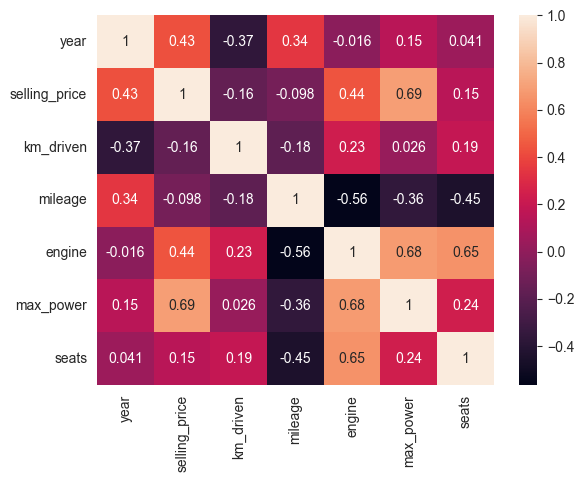

In [137]:
sns.heatmap(df_train_no_mis.corr(numeric_only=True), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [138]:
df_train_no_mis.corr(numeric_only=True).abs().min()

year             0.015696
selling_price    0.098075
km_driven        0.026407
mileage          0.098075
engine           0.015696
max_power        0.026407
seats            0.041178
dtype: float64

**Ответы**
- Наименее скоррелированы между собой признаки `engine` и `year`
- Признаки с сильной положительной линейной зависимостью:
    - `selling_price`, `max_power`: 0.69
    - `seats`, `engine`: 0.65
    - `engine`, `max_power`: 0.68
    - `selling_price`, `engine`: 0.44
    - `selling_price`, `year`: 0.43
    - `year`, `mileage`: 0.34
    - `engine`, `km_driven`: 0.23
- Утверждение правильное. Мы видим отрицательную зависимость между `year` и `km_driven` -0.37. Также, это соответствует бытовой интуиции

(0.25 балла) <font color='#9933CC'> Отобразите на диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Text(0, 0.5, 'Selling price')

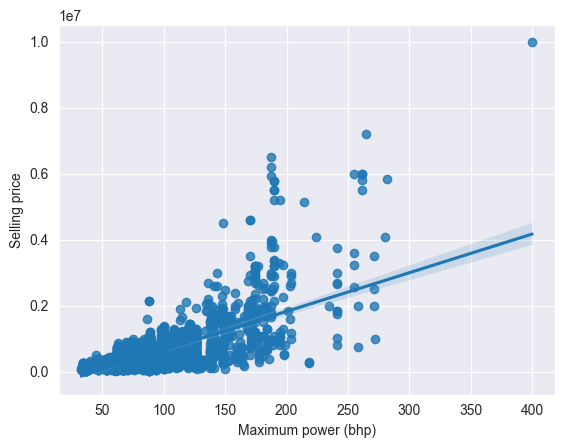

In [139]:
sns.regplot(
    x="max_power",
    y="selling_price",
    data=df_train_no_mis,

)
plt.xlabel("Maximum power (bhp)")
plt.ylabel("Selling price")


### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [140]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [141]:
y_train = df_train_no_mis["selling_price"]
X_train = df_train_no_mis.select_dtypes(exclude=["object", "category"])\
    .drop(columns="selling_price", axis=1)

In [142]:
assert X_train.shape == (5840, 6)

In [143]:
y_test = df_test_no_mis["selling_price"]
X_test = df_test_no_mis.select_dtypes(exclude=["object", "category"])\
    .drop(columns="selling_price", axis=1)

In [144]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [146]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [147]:
print(f"R2 score train: {r2_score(y_train, pred_train)}")
print(f"MSE score train: {MSE(y_train, pred_train)}")
print(f"R2 score test: {r2_score(y_test, pred_test)}")
print(f"MSE score test: {MSE(y_test, pred_test)}")

R2 score train: 0.5926915137883058
MSE score train: 116750229181.499
R2 score test: 0.5940246142770518
MSE score test: 233366255227.7733


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

In [149]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

pred_train = model.predict(X_train_scaled)
pred_test = model.predict(X_test_scaled)

print(f"R2 score train: {r2_score(y_train, pred_train)}")
print(f"MSE score train: {MSE(y_train, pred_train)}")
print(f"R2 score test: {r2_score(y_test, pred_test)}")
print(f"MSE score test: {MSE(y_test, pred_test)}")

R2 score train: 0.5926915137883046
MSE score train: 116750229181.4993
R2 score test: 0.5940246142770655
MSE score test: 233366255227.76538


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [150]:
model.coef_

array([158705.36554633, -42901.96627049,  24729.21405266,  57754.93536642,
       322432.98878913, -22262.3674027 ])

Самый информативный признак с весом 322432.988789 - `max_power`. Именно этот признак имеет наибольшую корреляцию с ценой

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [151]:
from sklearn.linear_model import Lasso

model_l1 = Lasso()
model_l1.fit(X_train_scaled, y_train)

Lasso()

In [152]:
pred_l1_train = model_l1.predict(X_train_scaled)
pred_l1_test = model_l1.predict(X_test_scaled)

print(f"R2 score train: {r2_score(y_train, pred_l1_train)}")
print(f"MSE score train: {MSE(y_train, pred_l1_train)}")
print(f"R2 score test: {r2_score(y_test, pred_l1_test)}")
print(f"MSE score test: {MSE(y_test, pred_l1_test)}")

R2 score train: 0.5926915137533608
MSE score train: 116750229191.51553
R2 score test: 0.5940234528881239
MSE score test: 233366922827.3237


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [153]:
model_l1.coef_

array([158705.01441118, -42900.87264493,  24727.47642467,  57750.13295223,
       322433.94927763, -22259.45811766])

Нет, не занулила. Похоже, что значение `alpha = 1` по-умолчанию не подходит. Предполагаю, что к-т регуляризации должен быть больше, чтобы сильнее штрафовать за большие значения весов.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [154]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {"alpha": (np.logspace(-6, 6, 200))}
model_l1 = GridSearchCV(lasso, params, cv=10)
model_l1.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1...
       4.10265811e+04, 4.71375313e+04, 5.41587138e+04, 6.22257084e+04,
       7.14942899e+04, 8.21434358e+04, 9.43787828e+04, 1.08436597e+05,
       1.24588336e+05, 1.43145894e+05, 1.64467618e+05, 1.88965234e+05,
       2.17111795e+05, 2.49450814e+05, 2.86606762e+05, 3.29297126e+05,
       3.78346262e+05, 4.34701316e+05, 4.99450512e+05, 5.73844165e+05,
       6.59318827e+05, 7.57525026e+05, 8.70359136e+05, 1.00000000e+06])})

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Я передал список из 200 значений alpha, следовательно, обучается 200 моделей. Есть еще кросс валидация по 10 фолдам. Но это процесс я рассматриваю как обучение одной модели, а не десяти.

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [155]:
print(f"Лучший к-т регуляризации: {model_l1.best_params_}")

Лучший к-т регуляризации: {'alpha': 27049.597304631316}


In [156]:
lasso = Lasso(alpha=model_l1.best_params_["alpha"])
lasso.fit(X_train_scaled, y_train)

pred_l1_train = lasso.predict(X_train_scaled)
pred_l1_test = lasso.predict(X_test_scaled)

print(f"R2 score train: {r2_score(y_train, pred_l1_train)}")
print(f"MSE score train: {MSE(y_train, pred_l1_train)}")
print(f"R2 score test: {r2_score(y_test, pred_l1_test)}")
print(f"MSE score test: {MSE(y_test, pred_l1_test)}")

R2 score train: 0.5833320105497566
MSE score train: 119433021671.99883
R2 score test: 0.5644545726795783
MSE score test: 250363960303.52167


In [157]:
lasso.coef_

array([148882.99572491, -14744.35156938,      0.        ,      0.        ,
       321118.97184296,     -0.        ])

Занулились к-ты при `mileage`, `engine`, `seats`

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [158]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(max_iter=5000)
params = {"alpha": (np.linspace(0.1, 2, 20)), "l1_ratio": (np.linspace(0.1, 1, 10))}
model_en = GridSearchCV(elastic_net, params, scoring="r2",
                        cv=10)
model_en.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=5000),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Перепробовал несколько вариантов параметров для GridSearchCV, получил разные значения alpha, l1_ratio, которые практически никак не сказываются на точности.

In [159]:
model_en.best_params_

{'alpha': 1.4, 'l1_ratio': 0.9}

In [160]:
elastic_net = ElasticNet(alpha=model_en.best_params_["alpha"],
                         l1_ratio=model_en.best_params_["l1_ratio"],)
elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=1.4, l1_ratio=0.9)

In [161]:
pred_en_train = elastic_net.predict(X_train_scaled)
pred_en_test = elastic_net.predict(X_test_scaled)

print(f"R2 score train: {r2_score(y_train, pred_en_train)}")
print(f"MSE score train: {MSE(y_train, pred_en_train)}")
print(f"R2 score test: {r2_score(y_test, pred_en_test)}")
print(f"MSE score test: {MSE(y_test, pred_en_test)}")

R2 score train: 0.5857487462472375
MSE score train: 118740292558.55394
R2 score test: 0.5637088722644812
MSE score test: 250792610215.59238


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [162]:
X_train_cat = df_train_no_mis.drop(columns=["selling_price", "name"])
X_test_cat = df_test_no_mis.drop(columns=["selling_price", "name"])

In [163]:
assert X_train_cat.shape == (5840, 10)

In [164]:
one_hot_mask = X_train_cat.select_dtypes(include=["category"]).columns.union(["seats"])
X_train_to_one_hot = X_train_cat[one_hot_mask]
X_train_numeric = X_train_cat.drop(columns=one_hot_mask)

In [165]:
X_test_to_one_hot = X_test_cat[one_hot_mask]
X_test_numeric = X_test_cat.drop(columns=one_hot_mask)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [166]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore",
                        drop="first",
                        sparse_output=False).set_output(transform="pandas")
X_dum_train = encoder.fit_transform(X_train_to_one_hot)
X_dum_test = encoder.transform(X_test_to_one_hot)

In [167]:
X_dum_train = pd.concat([X_dum_train, X_train_numeric], axis=1)
X_dum_test = pd.concat([X_dum_test, X_test_numeric], axis=1)

In [168]:
scaler = StandardScaler()
X_dum_train_scaled = pd.DataFrame(
    data=scaler.fit_transform(X_dum_train),
    columns=X_dum_train.columns
)
X_dum_test_scaled = pd.DataFrame(
    data=scaler.transform(X_dum_test),
    columns=X_dum_test.columns
)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [169]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {"alpha": (np.logspace(-3, 3, 200))}
model_l2 = GridSearchCV(ridge, params, scoring="r2", cv=10)
model_l2.fit(X_dum_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.07189132e-03, 1.14895100e-03, 1.23155060e-03,
       1.32008840e-03, 1.41499130e-03, 1.51671689e-03, 1.62575567e-03,
       1.74263339e-03, 1.86791360e-03, 2.00220037e-03, 2.14614120e-03,
       2.30043012e-03, 2.46581108e-03, 2.64308149e-03, 2.83309610e-03,
       3.03677112e-03, 3.25508860e-03, 3.48910121e-03, 3...
       2.02550194e+02, 2.17111795e+02, 2.32720248e+02, 2.49450814e+02,
       2.67384162e+02, 2.86606762e+02, 3.07211300e+02, 3.29297126e+02,
       3.52970730e+02, 3.78346262e+02, 4.05546074e+02, 4.34701316e+02,
       4.65952567e+02, 4.99450512e+02, 5.35356668e+02, 5.73844165e+02,
       6.15098579e+02, 6.59318827e+02, 7.06718127e+02, 7.57525026e+02,
       8.11984499e+02, 8.70359136e+02, 9.32930403e+02, 1.00000000e+03])},
             scoring='r2')

In [170]:
model_l2.best_params_

{'alpha': 615.0985788580505}

In [171]:
ridge_model = Ridge(alpha=model_l2.best_params_["alpha"])
ridge_model.fit(X_dum_train_scaled, y_train)

pred_l2_train = ridge_model.predict(X_dum_train_scaled)
pred_l2_test = ridge_model.predict(X_dum_test_scaled)

print(f"R2 score train: {r2_score(y_train, pred_l2_train)}")
print(f"MSE score train: {MSE(y_train, pred_l2_train)}")
print(f"R2 score test: {r2_score(y_test, pred_l2_test)}")
print(f"MSE score test: {MSE(y_test, pred_l2_test)}")

R2 score train: 0.6638368108513074
MSE score train: 96357259188.2978
R2 score test: 0.4906256778284439
MSE score test: 292802919227.9232


R2 на тесте значительно ниже чем на трейне - похоже, чо модель переобучилась

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

## 1. Генерация новых признаков
### Добавим признак - квадрат года

In [172]:
X_dum_train["year_squared"] = X_dum_train["year"] ** 2
X_dum_test["year_squared"] = X_dum_test["year"] ** 2

In [173]:
def get_prediction_scores(prediction: pd.DataFrame, y: pd.DataFrame) -> dict:
    return {
        "r2_score": r2_score(y, prediction),
        "MSE_score": MSE(y, prediction)
    }


def evaluate_model(
        model,
        X_train: pd.DataFrame,
        y_train: pd.DataFrame,
        X_test: pd.DataFrame,
        y_test: pd.DataFrame,
) -> dict:
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_scores = get_prediction_scores(pred_train, y_train)
    test_scores = get_prediction_scores(pred_test, y_test)
    print("Train dataset:\n"
          f"  R2 score: {train_scores['r2_score']}\n"
          f"  MSE score: {train_scores['MSE_score']}\n"
          "Test dataset:\n"
          f"  R2 score: {test_scores['r2_score']}\n"
          f"  MSE score: {test_scores['MSE_score']}\n\n")
    return {"train_scores": train_scores, "test_scores": test_scores}


def process_model_training_and_evaluating(
        X_train: pd.DataFrame,
        y_train: pd.DataFrame,
        X_test: pd.DataFrame,
        y_test: pd.DataFrame,
) -> tuple[pd.DataFrame, pd.DataFrame, StandardScaler, LinearRegression, Ridge]:
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(
        data=scaler.fit_transform(X_train),
        columns=X_dum_train.columns
    )
    X_test_scaled = pd.DataFrame(
        data=scaler.transform(X_test),
        columns=X_dum_test.columns
    )
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    print("Standard Linear Regression model scores:")
    evaluate_model(lr, X_train_scaled, y_train, X_test_scaled, y_test)

    ridge = Ridge()
    ridge_params = {"alpha": (np.logspace(-3, 3, 200))}
    l2 = GridSearchCV(ridge, ridge_params, scoring="r2", cv=10)
    l2.fit(X_train_scaled, y_train)
    best_params = l2.best_params_
    print(f"Ridge model best params: {best_params}")
    ridge_model = Ridge(alpha=l2.best_params_["alpha"])
    ridge_model.fit(X_train_scaled, y_train)
    print("Ridge model scores:")
    evaluate_model(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

    return X_train_scaled, X_test_scaled, scaler, lr, ridge_model

In [174]:
print("Оценим предсказание модели для датасета с добавленным квадратом года")
X_train_scaled, X_test_scaled, scaler, lr, ridge_model = process_model_training_and_evaluating(
    X_dum_train, y_train, X_dum_test, y_test
)

Оценим предсказание модели для датасета с добавленным квадратом года
Standard Linear Regression model scores:
Train dataset:
  R2 score: 0.6806464510253944
  MSE score: 91538971798.71666
Test dataset:
  R2 score: 0.5498510697172017
  MSE score: 258758471200.94647


Ridge model best params: {'alpha': 0.001}
Ridge model scores:
Train dataset:
  R2 score: 0.6804537448750392
  MSE score: 91594208770.15305
Test dataset:
  R2 score: 0.5478020039915827
  MSE score: 259936332746.05408




Добавим признак - мощность двигателя на литр объема

In [175]:
X_dum_train["max_power_per_engine_volume"] = X_dum_train["max_power"] / X_dum_train["engine"] * 1000
X_dum_test["max_power_per_engine_volume"] = X_dum_test["max_power"] / X_dum_test["engine"] * 1000

In [176]:
print('Оценим предсказание модели для датасета с дополнительным параметром "max_power_per_engine_volume"')
X_train_scaled, X_test_scaled, scaler, lr, ridge_model = process_model_training_and_evaluating(
    X_dum_train, y_train, X_dum_test, y_test
)

Оценим предсказание модели для датасета с дополнительным параметром "max_power_per_engine_volume"
Standard Linear Regression model scores:
Train dataset:
  R2 score: 0.686165308140476
  MSE score: 89957055745.36235
Test dataset:
  R2 score: 0.5712969454504894
  MSE score: 246430768867.35492


Ridge model best params: {'alpha': 0.001}
Ridge model scores:
Train dataset:
  R2 score: 0.6859605591644458
  MSE score: 90015744652.38351
Test dataset:
  R2 score: 0.5689859329507526
  MSE score: 247759204905.1402




### Логарифмирование цены

In [177]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [178]:
print('Оценим предсказание модели для датасета с прологарифмированной ценой')
X_train_scaled, X_test_scaled, scaler, lr_model, ridge_model = process_model_training_and_evaluating(
    X_dum_train, y_train_log, X_dum_test, y_test_log
)

Оценим предсказание модели для датасета с прологарифмированной ценой
Standard Linear Regression model scores:
Train dataset:
  R2 score: 0.8480153447521878
  MSE score: 0.0888175372436103
Test dataset:
  R2 score: 0.8137316535397625
  MSE score: 0.13323908104791277


Ridge model best params: {'alpha': 0.001}
Ridge model scores:
Train dataset:
  R2 score: 0.8479327825584031
  MSE score: 0.08886578534279785
Test dataset:
  R2 score: 0.8136432814734569
  MSE score: 0.1333022942192788




# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [179]:
def business_metrics(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise Exception("The lengths of the passed numpy arrays must be the same")
    y_frac = np.abs(y_true - y_pred) / y_true
    best_y = y_frac[y_frac <= 0.1]
    return len(best_y) / len(y_true) * 100

In [184]:
print("Посчитаем бизнес метрику для модели с логарифмированной ценой")

pred_log = ridge_model.predict(X_test_scaled)
pred = np.exp(pred_log)
score = business_metrics(y_test, pred)
print("Business_metrics score", score, "%")

Посчитаем бизнес метрику для модели с логарифмированной ценой
Business_metrics score 23.400000000000002 %


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Сохраним данные модели в pickle файл

In [182]:
from pickle import dump
inference_objects = {
    "model": ridge_model,
    "scaler": scaler,
    "one_hot_encoder": encoder,
}
dump(inference_objects, open("inference_objects.pickle", "wb"))

Сохраним тестовый датасет в csv файл, предварительно удалив колонку `selling_price` и строки с пустыми значениями

In [188]:
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')
df_test = df_test.drop(columns=["selling_price"], axis=1)
df_test = df_test.dropna()
df_test.to_csv("cars_test.csv")

In [183]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link